# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [3]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
# Print the first few rows of the dataset
print(dataset.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:

dataset.shape

(150, 5)

In [6]:
# Print the column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [7]:
dataset.dropna(inplace=True)


3. Encoding the class label categorical column: from string to num


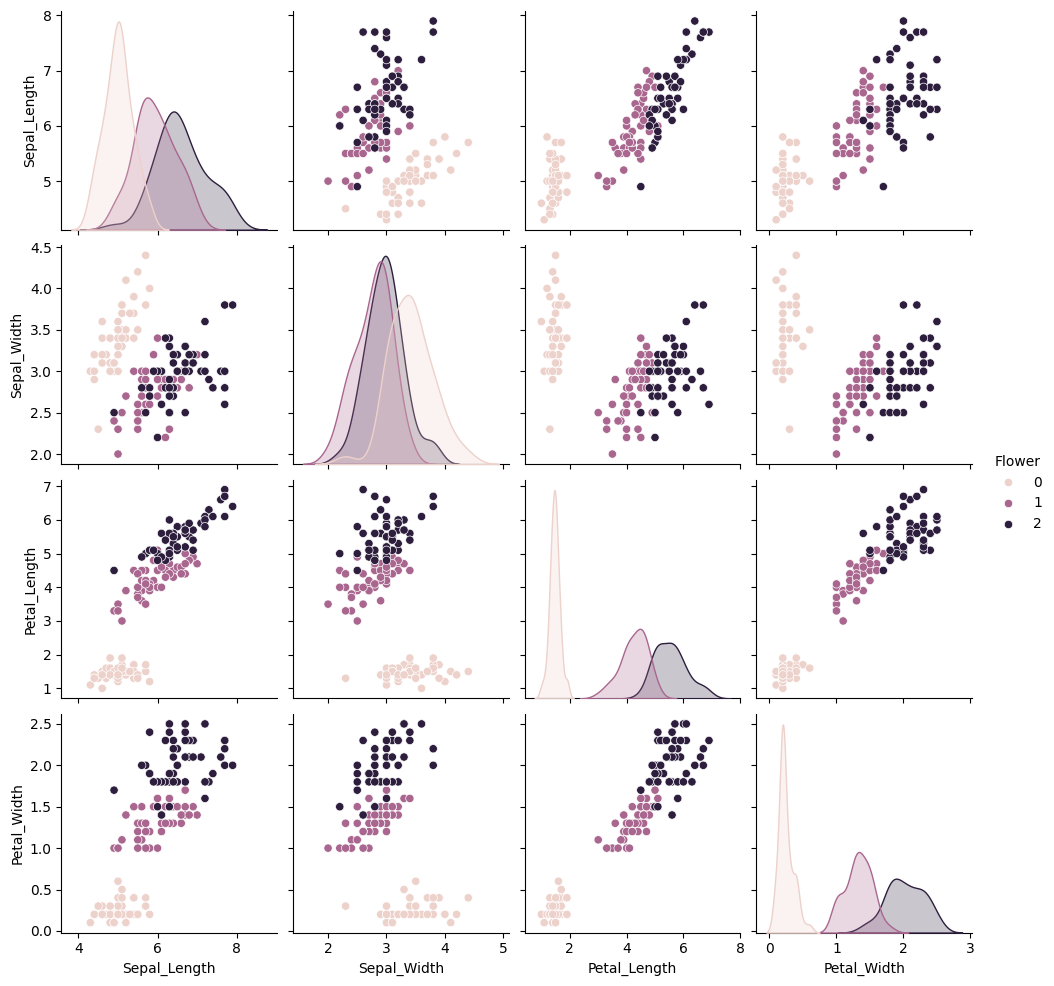

In [8]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset["Flower"] = dataset["Flower"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})


#Visualize the dataset
sns.pairplot(dataset, hue="Flower")
plt.show()


Now the label/category is numeric


4. Discard columns that won't be used


5. Scatter plot of the data

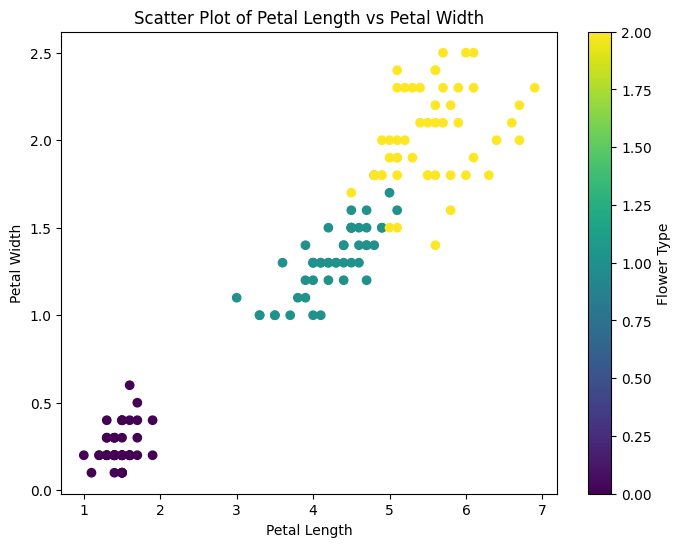

In [9]:
# Scatter plot of Petal_Length vs Petal_Width
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'], c=dataset['Flower'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.colorbar(label='Flower Type')
plt.show()


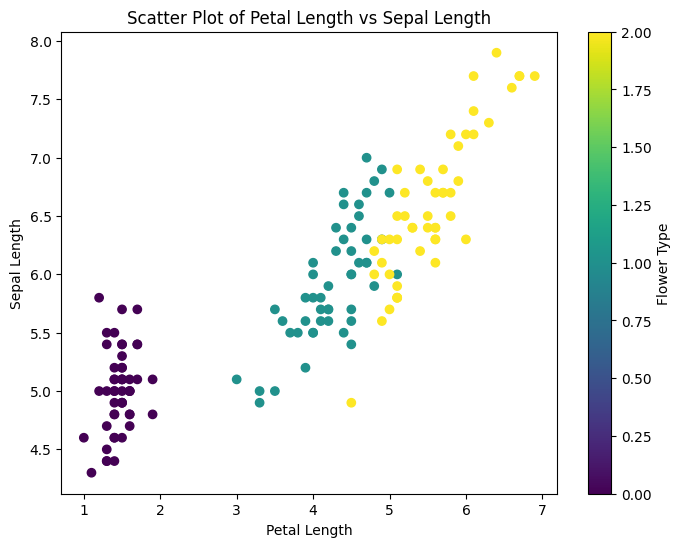

In [10]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Petal_Length'], dataset['Sepal_Length'], c=dataset['Flower'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Scatter Plot of Petal Length vs Sepal Length')
plt.colorbar(label='Flower Type')
plt.show()


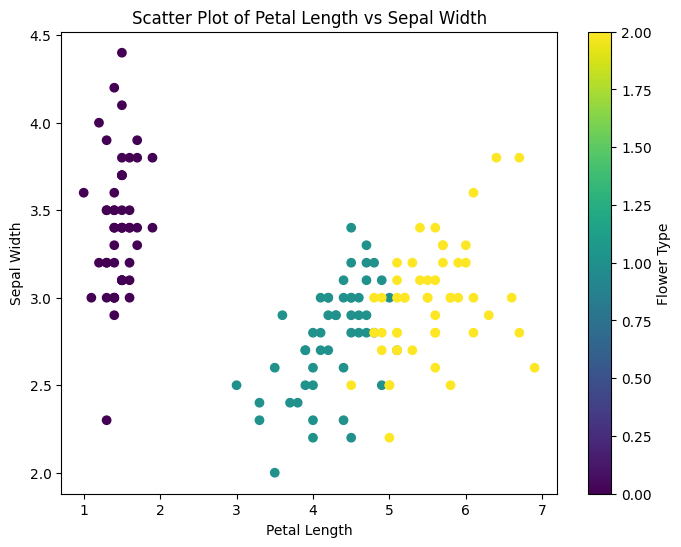

In [11]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Petal_Length'], dataset['Sepal_Width'], c=dataset['Flower'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Petal Length vs Sepal Width')
plt.colorbar(label='Flower Type')
plt.show()


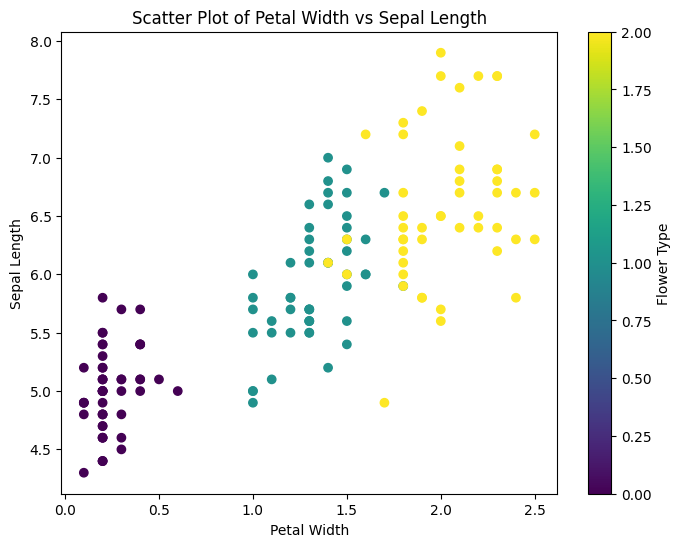

In [12]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Petal_Width'], dataset['Sepal_Length'], c=dataset['Flower'])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Scatter Plot of Petal Width vs Sepal Length')
plt.colorbar(label='Flower Type')
plt.show()


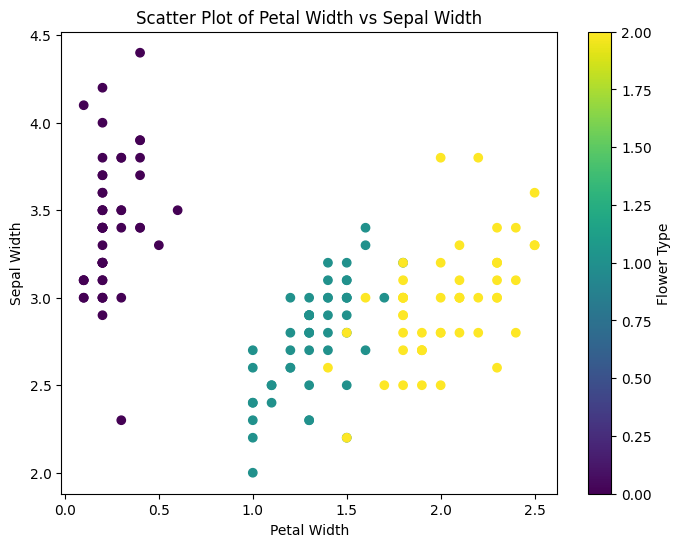

In [13]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Petal_Width'], dataset['Sepal_Width'], c=dataset['Flower'])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Petal Width vs Sepal Width')
plt.colorbar(label='Flower Type')
plt.show()


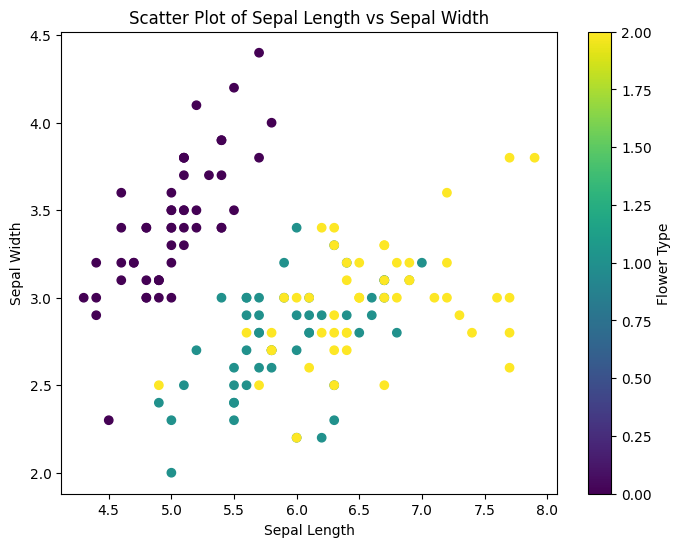

In [14]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Sepal_Length'], dataset['Sepal_Width'], c=dataset['Flower'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.colorbar(label='Flower Type')
plt.show()


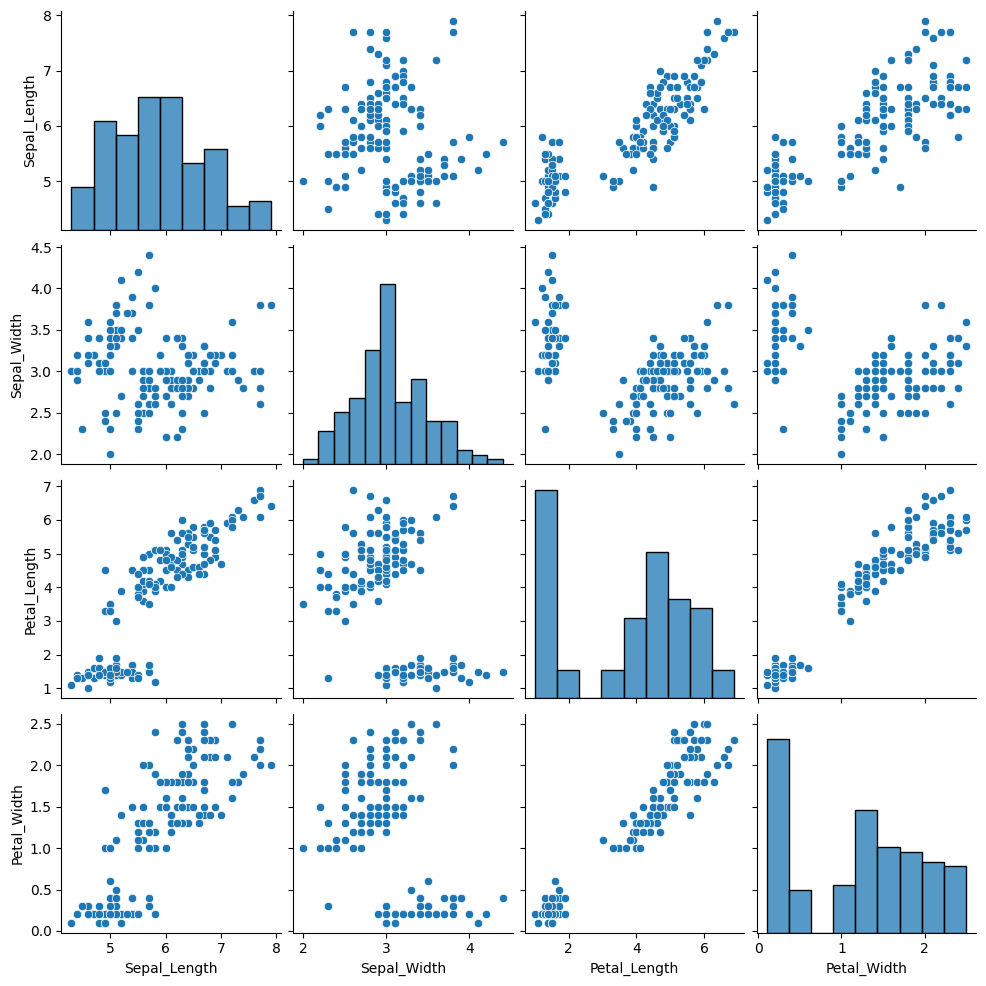

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop('Flower', axis=1))
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

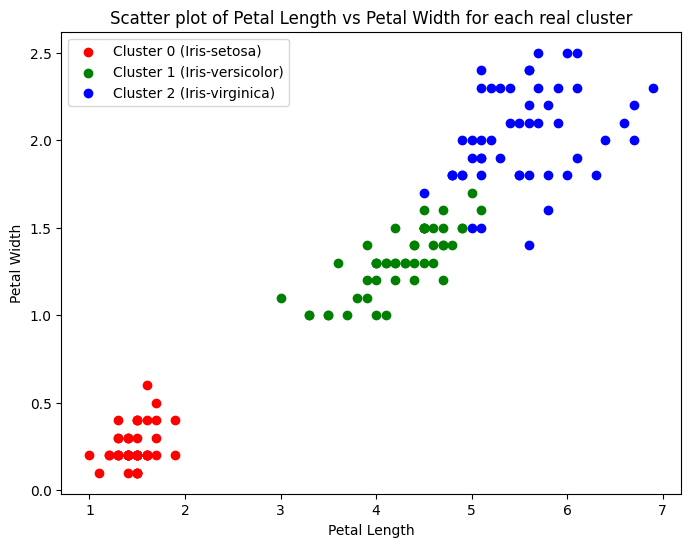

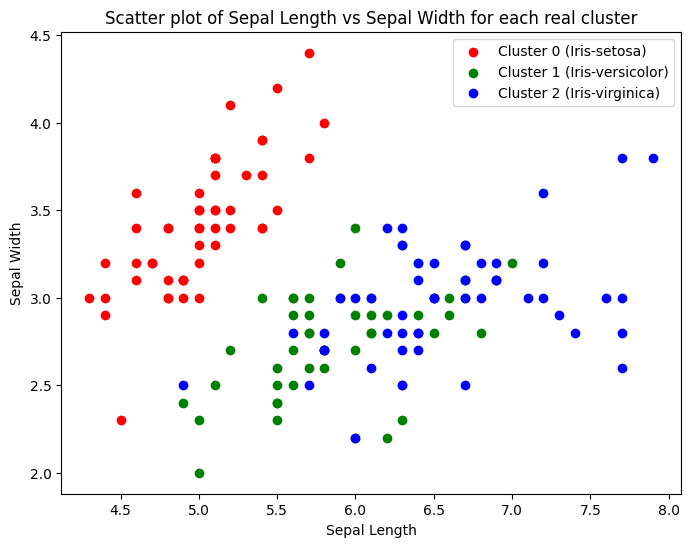

In [19]:
# # Scatter plot of each real cluster for Petal
# # Scatter plot of each real cluster for Sepal

import matplotlib.pyplot as plt
# Get dataframes for each real cluster
cluster_0 = dataset[dataset['Flower'] == 0]
cluster_1 = dataset[dataset['Flower'] == 1]
cluster_2 = dataset[dataset['Flower'] == 2]


# Scatter plot of each real cluster for Petal
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0['Petal_Length'], cluster_0['Petal_Width'], label='Cluster 0 (Iris-setosa)', color='red')
plt.scatter(cluster_1['Petal_Length'], cluster_1['Petal_Width'], label='Cluster 1 (Iris-versicolor)', color='green')
plt.scatter(cluster_2['Petal_Length'], cluster_2['Petal_Width'], label='Cluster 2 (Iris-virginica)', color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width for each real cluster')
plt.legend()
plt.show()


# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0['Sepal_Length'], cluster_0['Sepal_Width'], label='Cluster 0 (Iris-setosa)', color='red')
plt.scatter(cluster_1['Sepal_Length'], cluster_1['Sepal_Width'], label='Cluster 1 (Iris-versicolor)', color='green')
plt.scatter(cluster_2['Sepal_Length'], cluster_2['Sepal_Width'], label='Cluster 2 (Iris-virginica)', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of Sepal Length vs Sepal Width for each real cluster')
plt.legend()
plt.show()


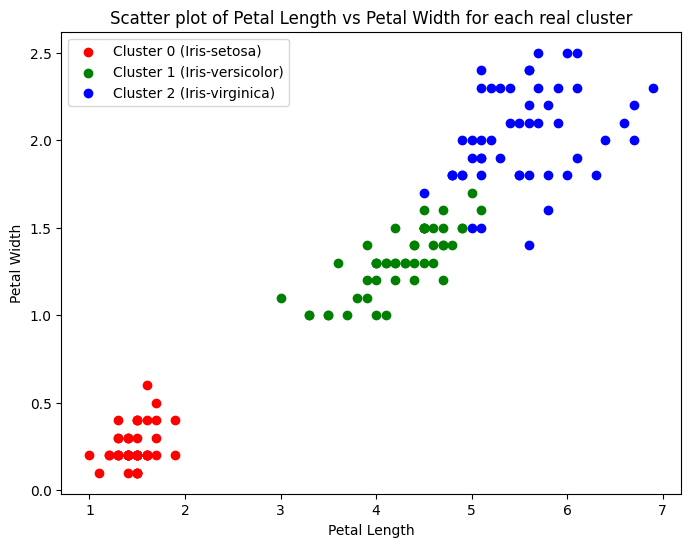

In [20]:
# Scatter plot of each real cluster for Petal
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0['Petal_Length'], cluster_0['Petal_Width'], label='Cluster 0 (Iris-setosa)', color='red')
plt.scatter(cluster_1['Petal_Length'], cluster_1['Petal_Width'], label='Cluster 1 (Iris-versicolor)', color='green')
plt.scatter(cluster_2['Petal_Length'], cluster_2['Petal_Width'], label='Cluster 2 (Iris-virginica)', color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width for each real cluster')
plt.legend()
plt.show()


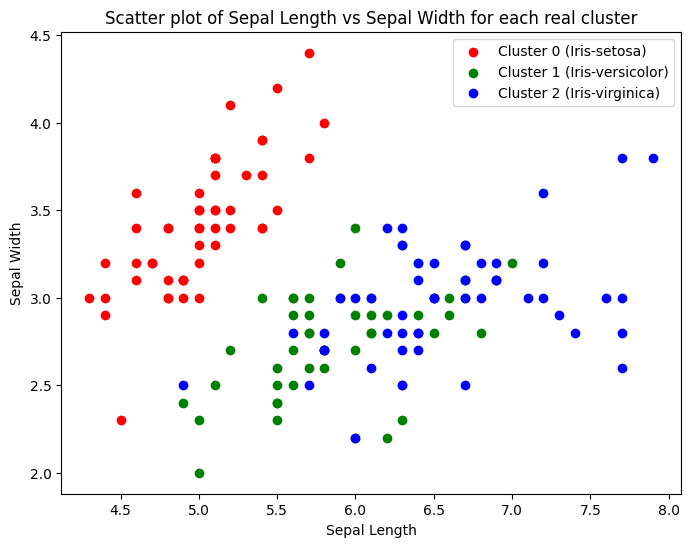

In [21]:
# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0['Sepal_Length'], cluster_0['Sepal_Width'], label='Cluster 0 (Iris-setosa)', color='red')
plt.scatter(cluster_1['Sepal_Length'], cluster_1['Sepal_Width'], label='Cluster 1 (Iris-versicolor)', color='green')
plt.scatter(cluster_2['Sepal_Length'], cluster_2['Sepal_Width'], label='Cluster 2 (Iris-virginica)', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of Sepal Length vs Sepal Width for each real cluster')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [23]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
X  = dataset[["Petal_Length", "Petal_Width"]].values
X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


Shape of X: (150, 2)
First 5 rows of X:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Unique values in y: [0 1 2]

Descriptive statistics of X:
                 0           1
count  150.000000  150.000000
mean     5.843333    3.054000
std      0.828066    0.433594
min      4.300000    2.000000
25%      5.100000    2.800000
50%      5.800000    3.000000
75%      6.400000    3.300000
max      7.900000    4.400000

Correlation matrix of X:
           0         1
0  1.000000 -0.109369
1 -0.109369  1.000000


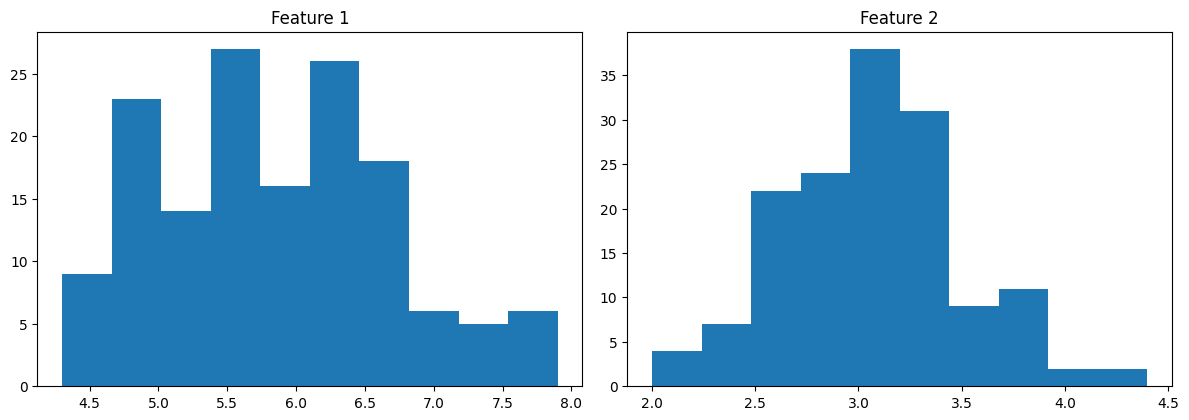

In [ ]:
# Understand the data X
print("Shape of X:", X.shape)
print("First 5 rows of X:\n", X[:5])
print("Unique values in y:", np.unique(y))

# Descriptive statistics of X
print("\nDescriptive statistics of X:\n", pd.DataFrame(X).describe())

# Correlation matrix of X
print("\nCorrelation matrix of X:\n", pd.DataFrame(X).corr())

# Visualize the distribution of features in X
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
  plt.subplot(2, 2, i+1)
  plt.hist(X[:, i], bins=10)
  plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()



Shape of y: (150,)
First 5 rows of y:
 [0 0 0 0 0]
Unique values in y: [0 1 2]

Descriptive statistics of y:
 count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
dtype: float64


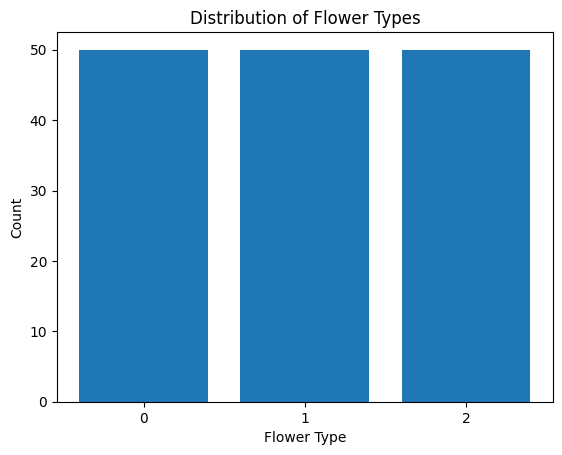

In [25]:
# Understand the data y
print("Shape of y:", y.shape)
print("First 5 rows of y:\n", y[:5])
print("Unique values in y:", np.unique(y))

# Descriptive statistics of y
print("\nDescriptive statistics of y:\n", pd.Series(y).describe())

# Distribution of y
plt.hist(y, bins=np.arange(y.min(), y.max() + 2) - 0.5, rwidth=0.8)
plt.xlabel("Flower Type")
plt.ylabel("Count")
plt.title("Distribution of Flower Types")
plt.xticks(np.unique(y))
plt.show()


In [26]:
# Calculate the number of observations in the dataset
num_observations = dataset.shape[0]
print("Number of observations in the dataset:", num_observations)


Number of observations in the dataset: 150


In [27]:
# Calculate the number of observations for class 0
num_observations_class_0 = len(dataset[dataset['Flower'] == 0])
print("Number of observations for class 0:", num_observations_class_0)


Number of observations for class 0: 50


In [28]:
# Calculate the number of observations for class 1
num_observations_class_1 = len(dataset[dataset['Flower'] == 1])
print("Number of observations for class 1:", num_observations_class_1)


Number of observations for class 1: 50


In [29]:
# Calculate the number of observations for class 2
num_observations_class_2 = len(dataset[dataset['Flower'] == 2])
print("Number of observations for class 2:", num_observations_class_2)


Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Fit the model to the training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Predict the class of a new observation

In [35]:
# Get a new observation
xnew = np.array([[5.5, 3.5]])
xnew = np.array([[5.5, 2.5]])
xnew = np.array([[6.5, 3.5]])

# Print the new observation
xnew


array([[6.5, 3.5]])

In [36]:
# Make the prediction using xnew
ynew = classifier.predict(xnew)

# Get the predicted class
print("Predicted class:", ynew)


Predicted class: [2]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [39]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as in your previous code
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training data features
# X_test: Testing data features
# y_train: Training data labels
# y_test: Testing data labels

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (120, 2)
Testing data shape: (30, 2)


In [40]:
# Calculate the number of observations in the train set
num_observations_train = X_train.shape[0]
print("Number of observations in the train set:", num_observations_train)


Number of observations in the train set: 120


In [41]:
# Calculate the number of observations for each class in the train set
num_observations_class_0_train = sum(y_train == 0)
print("Number of observations for class 0 in the train set:", num_observations_class_0_train)

num_observations_class_1_train = sum(y_train == 1)
print("Number of observations for class 1 in the train set:", num_observations_class_1_train)

num_observations_class_2_train = sum(y_train == 2)
print("Number of observations for class 2 in the train set:", num_observations_class_2_train)


Number of observations for class 0 in the train set: 40
Number of observations for class 1 in the train set: 41
Number of observations for class 2 in the train set: 39


In [44]:
# Calculate the number of observations in the test set
num_observations_test = X_test.shape[0]
print("Number of observations in the test set:", num_observations_test)

Number of observations in the test set: 30


In [45]:
# Calculate the number of observations for each class in the test set
num_observations_class_0_test = sum(y_test == 0)
print("Number of observations for class 0 in the test set:", num_observations_class_0_test)

num_observations_class_1_test = sum(y_test == 1)
print("Number of observations for class 1 in the test set:", num_observations_class_1_test)

num_observations_class_2_test = sum(y_test == 2)
print("Number of observations for class 2 in the test set:", num_observations_class_2_test)


Number of observations for class 0 in the test set: 10
Number of observations for class 1 in the test set: 9
Number of observations for class 2 in the test set: 11


## Train the classification model

In [46]:
# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Fit the model to the training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Test the classification model

In [47]:
# Make the predictions using the test set
y_pred = classifier.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)


Predictions: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]


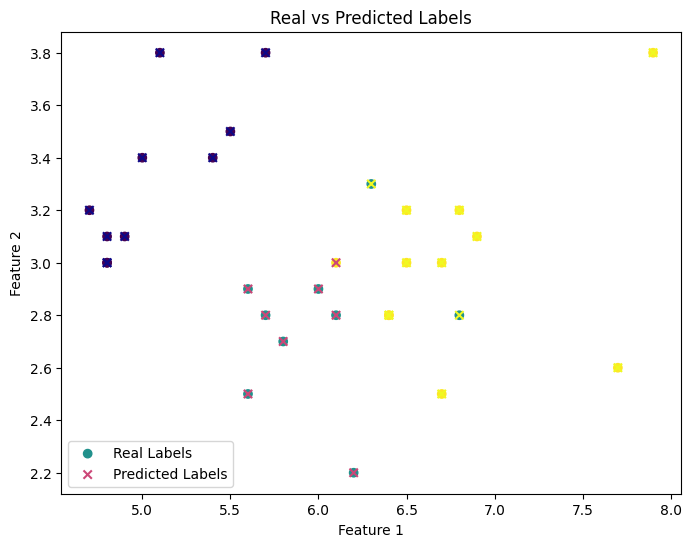

In [48]:
# Explore real and predicted labels
plt.figure(figsize=(8, 6))

# Plot real labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Real Labels')

# Plot predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='plasma', marker='x', label='Predicted Labels')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Real vs Predicted Labels')
plt.legend()
plt.show()


## Compute the acurracy

In [49]:
def compute_accuracy(y_true, y_pred):
  """Computes the accuracy of the predictions.

  Args:
    y_true: The true labels.
    y_pred: The predicted labels.

  Returns:
    The accuracy of the predictions.
  """
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = correct_predictions / total_predictions
  return accuracy


In [50]:
# ## Compute the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [51]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are defined as in your previous code
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [52]:
# Get the indices of the true positive predictions for class 0
true_positives_class_0_indices = np.where((y_test == 0) & (y_pred == 0))

# Get the number of true positive predictions for class 0
num_true_positives_class_0 = len(true_positives_class_0_indices[0])

# Get the total number of observations for class 0 in the test set
total_observations_class_0 = np.sum(y_test == 0)

# Calculate the accuracy for class 0
if total_observations_class_0 > 0:
  accuracy_class_0 = num_true_positives_class_0 / total_observations_class_0
  print("Accuracy for class 0:", accuracy_class_0)
else:
  print("No observations for class 0 in the test set.")


Accuracy for class 0: 1.0


In [53]:
# Get the indices of the true positive predictions for class 1
true_positives_class_1_indices = np.where((y_test == 1) & (y_pred == 1))

# Get the number of true positive predictions for class 1
num_true_positives_class_1 = len(true_positives_class_1_indices[0])

# Get the total number of observations for class 1 in the test set
total_observations_class_1 = np.sum(y_test == 1)

# Calculate the accuracy for class 1
if total_observations_class_1 > 0:
  accuracy_class_1 = num_true_positives_class_1 / total_observations_class_1
  print("Accuracy for class 1:", accuracy_class_1)
else:
  print("No observations for class 1 in the test set.")


Accuracy for class 1: 0.7777777777777778


In [54]:
# Get the indices of the true positive predictions for class 2
true_positives_class_2_indices = np.where((y_test == 2) & (y_pred == 2))

# Get the number of true positive predictions for class 2
num_true_positives_class_2 = len(true_positives_class_2_indices[0])

# Get the total number of observations for class 2 in the test set
total_observations_class_2 = np.sum(y_test == 2)

# Calculate the accuracy for class 2
if total_observations_class_2 > 0:
  accuracy_class_2 = num_true_positives_class_2 / total_observations_class_2
  print("Accuracy for class 2:", accuracy_class_2)
else:
  print("No observations for class 2 in the test set.")


Accuracy for class 2: 0.9090909090909091


## Confussion matrix

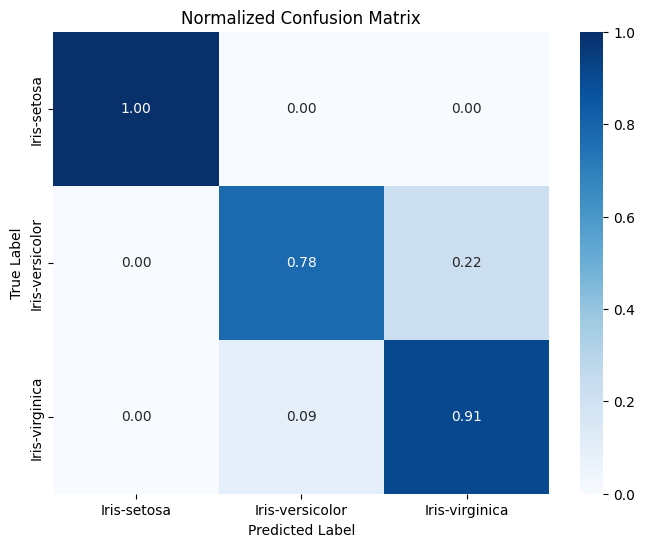

In [55]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?
Thw two petal model provides the best accuracy

2) Using the four variables, try with two classifiers. Which provides the best performance? SVC